# TP: Aprendizaje de Máquinas

## Requerimientos

1. **Análisis Exploratorio de Datos (EDA)**  
   Comprensión inicial del dataset, estadísticas descriptivas, identificación de variables, visualizaciones para entender distribuciones, correlaciones y posibles problemas como valores nulos o atípicos.

2. **Preprocesamiento y Preparación de Datos**  
   Descripción de las transformaciones aplicadas a los datos para prepararlos para el modelado. Esto incluye, pero no se limita a: limpieza de datos, imputación de valores faltantes, codificación de variables categóricas, escalado de características, etc.

3. **Modelización**  
   Construcción y entrenamiento de los modelos de aprendizaje automático.

4. **Evaluación de Resultados**  
   Análisis cuantitativo y cualitativo del rendimiento de los modelos utilizando métricas apropiadas. Se deben interpretar los resultados en el contexto del problema original.

---

## Dataset elegido

**Letterboxd Movie Classification Dataset**, extraído de [Kaggle](https://www.kaggle.com/datasets/sahilislam007/letterbox-movie-classification-dataset).  

Este archivo contendrá el análisis exploratorio de datos de dicho dataset.

---

## Plan de trabajo

### 1. Análisis Exploratorio de Datos (EDA)

Para el EDA se realizarán los siguientes pasos:

- **Análisis de cardinalidad** de las variables principales.  
- **Análisis de directores, géneros y duración (runtime)**.  
- **Análisis del idioma original** de las películas.  
- **Análisis de las métricas de popularidad**:  
  - `watching` (visualizaciones)  
  - `appearances` (apariciones en listas)  
  - `likes`  
  - `fans`  

### 2. Análisis de correlaciones

- Estudio de las relaciones entre variables numéricas y categóricas.  
- Identificación de patrones relevantes para el posterior modelado.


## Carga inicial del dataset

In [13]:
#!pip install category_encoders
import requests
import zipfile
import io
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np
import os

def descargar_y_descomprimir(url, carpeta_destino="datos"):
    # Crear carpeta si no existe
    os.makedirs(carpeta_destino, exist_ok=True)

    # Descargar archivo
    print("Descargando archivo...")
    response = requests.get(url, stream=True)
    if response.status_code != 200:
        raise Exception(f"Error al descargar archivo: {response.status_code}")

    # Descomprimir desde memoria
    print("Descomprimiendo archivo...")
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(carpeta_destino)

    print(f"Archivo descargado y extraído en '{carpeta_destino}'")

# Ejemplo de uso
# moviews
#url = "https://www.kaggle.com/api/v1/datasets/download/sufyan145/netflix-movies-and-shows-imdb-scores"
# letterbox
url = "https://www.kaggle.com/api/v1/datasets/download/sahilislam007/letterbox-movie-classification-dataset"
descargar_y_descomprimir(url)

Descargando archivo...
Descomprimiendo archivo...
Archivo descargado y extraído en 'datos'


###  Comprensión inicial del dataset
- Muestra del dataset.
- informacion del tipo de variable.


In [ ]:
# List files in the current directory to find the extracted data file
folder_path = "datos"

if os.path.exists(folder_path):
    files_in_folder = os.listdir(folder_path)
print("Files in the current directory:", files_in_folder)

# Assuming the data is in a CSV file, find the first one
csv_file = None
for file in files_in_folder:
    if file.endswith('.csv'):
        csv_file = file
        break

if csv_file:
    print(f"Loading data from: {folder_path}/{csv_file}")
    # Load the data into a pandas DataFrame
    df = pd.read_csv(f"{folder_path}/{csv_file}")

    # Display the first few rows of the DataFrame
    display(df.head())
else:
    print("No CSV file found in the extracted contents.")

Files in the current directory: ['Letterbox Movie Classification Dataset.csv']
Loading data from: datos/Letterbox Movie Classification Dataset.csv


,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_ratings      1000


## Análisis de Cardinalidad



In [16]:
# Obtenemos la cardinalidad de cada columna
cardinalidad = df.nunique().sort_values(ascending=False)

print("Cardinalidad de cada variable:")
print(cardinalidad)

# Cantidad de valores nulos por columna
nulos = df.isnull().sum()

print("Cantidad de valores nulos por variable:")
print(nulos)

Cardinalidad de cada variable:
Unnamed: 0           10000
Description           9963
Film_title            9665
Watches               8794
Total_ratings         8338
Studios               8016
List_appearances      7887
Likes                 6741
Medium★★★             6370
Director              4762
Highest★★★★★          4699
Lowest★               3086
Genres                2397
Fans                   963
Average_rating         327
Runtime                301
Original_language       57
dtype: int64
Cantidad de valores nulos por variable:
Unnamed: 0           0
Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest★              0
Medium★★★            0
Highest★★★★★         0
Total_ratings        0
dtype: int64



### Variables con cardinalidad muy alta
- **Unnamed: 0 (10.000 valores únicos):** probablemente corresponde a un índice único, por lo que no aporta información relevante como variable.  
- **Description (9.963) y Film_title (9.665):** prácticamente todos los valores son distintos, como era de esperar en descripciones y títulos de películas.  
- **Watches (8.794), Total_ratings (8.338), Studios (8.016), List_appearances (7.887), Likes (6.741), Medium★★★ (6.370), Director (4.762), Highest★★★★★ (4.699):** presentan una alta diversidad. Esto indica que se trata de variables numéricas o categóricas con gran dispersión (por ejemplo, múltiples estudios de producción o gran variedad de directores).

### Variables con cardinalidad media
- **Lowest★ (3.086) y Genres (2.397):** aunque los géneros tienen menos variedad, el número sigue siendo elevado considerando que puede haber múltiples combinaciones por película.  
- **Fans (963), Average_rating (327), Runtime (301):** en particular, *Runtime* refleja la duración en minutos y tener ~300 valores únicos resulta consistente con la diversidad de duraciones en el cine.

### Variables con cardinalidad baja
- **Original_language (57):** un conjunto reducido de categorías. Se analizará más en detalle para decidir si conviene aplicar técnicas de codificación como *OneHotEncoding* o *TargetEncoding*.

---

### Conclusión preliminar
- No se detectan valores nulos en las variables, por lo que en principio **no es necesario realizar imputación de valores faltantes**.  
- La mayoría de las variables presentan una **alta cardinalidad**, lo que puede requerir estrategias específicas de representación (ej. reducción de dimensionalidad o embeddings).  
- Algunas variables, como *Original_language*, son candidatas claras a técnicas de codificación categórica.


## Analisis del titulo de la pelicula.

In [17]:
a = df[df['Film_title'].str.contains('Hercules', case=False, na=False)]
a.head(3)

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
173,173,Hercules,"Ron Clements, John Musker",3.82,"['Animation', 'Adventure', 'Romance', 'Comedy'...",93.0,English,"Bestowed with superhuman strength, a young mor...","['Walt Disney Pictures', 'Walt Disney Feature ...",1318587,115062,291974,6200,3188,107615,115996,627632
442,442,Hercules,Luigi Cozzi,2.65,"['Fantasy', 'Action', 'Adventure']",98.0,English,"Hercules, a semi-divine being, squares off aga...","['Golan-Globus Productions', 'Cannon Italia Sr...",5221,3625,884,7,322,721,122,3314
775,775,Hercules,Brett Ratner,2.28,"['Action', 'Adventure']",98.0,English,"When a new enemy threatens the innocent, Hercu...","['Paramount Pictures', 'Radical Studios', 'Fly...",99639,9824,6391,11,5521,12639,659,58564


Durante el análisis se identificó que existen películas con **títulos repetidos pero asociados a directores diferentes**.  
Esto sugiere que se trata de **producciones distintas** que comparten el mismo nombre.  

Para evitar confusiones o duplicados indebidos en el dataset, se decidió considerar cada **combinación de *título + director*** como una entrada única en el análisis.


## Analisis de la variable Director:

Número total de directores únicos: 4762
Top 20 directores con más películas:
Director
Chuck Jones           50
Cirio H. Santiago     42
Antonio Margheriti    39
Steven Spielberg      31
Robert Stevenson      31
Roy Rowland           28
Roger Corman          28
William Witney        28
Sergio Martino        27
Ridley Scott          26
Sergio Corbucci       26
J. Lee Thompson       26
Ken Russell           24
Woody Allen           23
Richard Donner        22
Joel Schumacher       22
Steven Soderbergh     22
John Sturges          21
Howard Hawks          21
Wes Craven            21
Name: count, dtype: int64


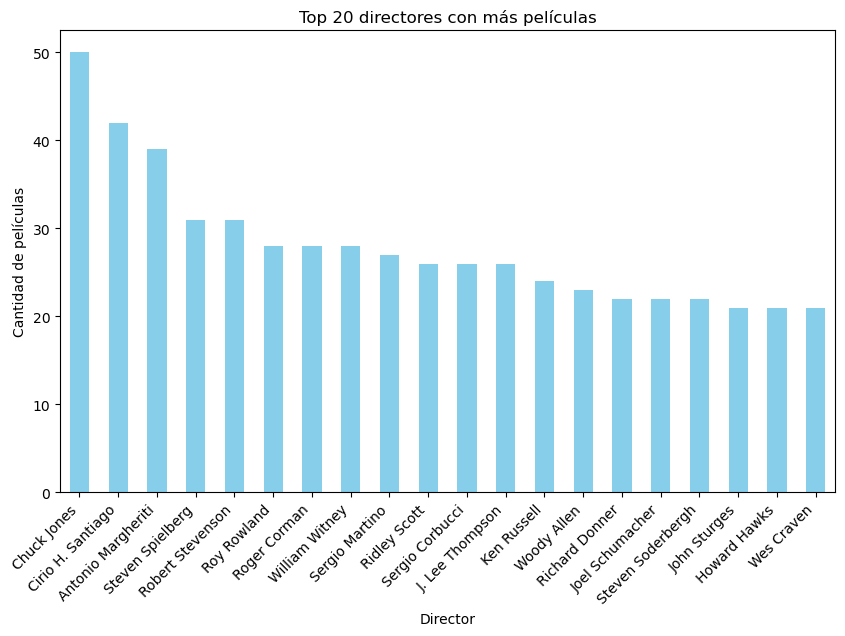

In [18]:

# Mostrar cuántos directores únicos hay
num_directores = df['Director'].nunique()
print(f"Número total de directores únicos: {num_directores}")

# Mostrar los 20 directores con más películas en el dataset
top_directores = df['Director'].value_counts().head(20)
print("Top 20 directores con más películas:")
print(top_directores)

# Gráfico de barras de los 20 directores con más películas
plt.figure(figsize=(10,6))
top_directores.plot(kind='bar', color='skyblue')
plt.title('Top 20 directores con más películas')
plt.xlabel('Director')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 20 directores con más películas

La Figura muestra los **20 directores con mayor número de películas registradas en el dataset**.  
Se observa que:

- **Chuck Jones** encabeza la lista con más de 50 películas, lo cual refleja la importancia de su trayectoria en la animación.  
- Le siguen **Ciriño H. Santiago** y **Antonio Margheriti**, ambos directores muy prolíficos en géneros específicos como acción y cine de explotación.  
- Directores reconocidos internacionalmente como **Steven Spielberg** y **Ridley Scott** también aparecen en la lista, aunque con menor volumen de producciones.  
- En la parte baja del ranking se ubican directores como **Wes Craven**, **Howard Hawks** y **Steven Soderbergh**, quienes si bien tienen menor cantidad de películas, poseen gran relevancia cultural o crítica.

**Interpretación:**  
El análisis de directores muestra que el dataset no solo está compuesto por grandes nombres de Hollywood, sino también por cineastas prolíficos en producciones de bajo presupuesto o de nicho. Esto aporta diversidad en la base de datos y puede influir en los resultados del clustering, ya que los estilos y géneros asociados a cada director condicionan las características de las películas.

**Conclusión:**  
La variable *director* refleja tanto la concentración de películas en figuras emblemáticas de la industria como la inclusión de directores de cine más especializado. Este equilibrio es valioso para un sistema recomendador, ya que permite captar tanto el mainstream como los nichos específicos de audiencia. 


### Peliculas por director

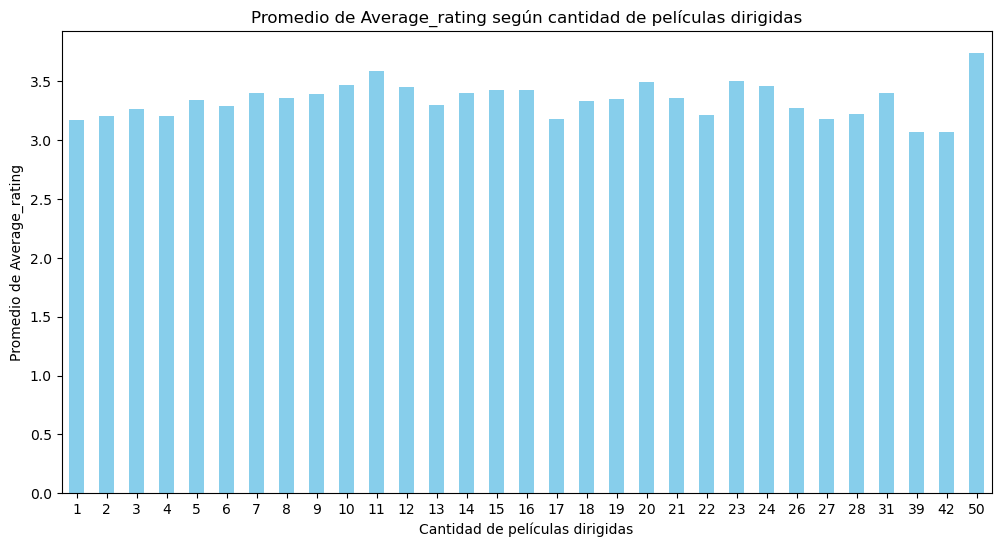

In [19]:
# Contar cuántas películas tiene cada director
peliculas_por_director = df['Director'].value_counts()

# Crear un DataFrame con director y cantidad de películas
df_directores = pd.DataFrame({
    'Director': peliculas_por_director.index,
    'Cantidad_peliculas': peliculas_por_director.values
})

# Unir con el dataset original para obtener el Average_rating por director
df_merge = pd.merge(df, df_directores, on='Director')

# Calcular promedio de Average_rating agrupado por cantidad de películas dirigidas
rating_por_cantidad = df_merge.groupby('Cantidad_peliculas')['Average_rating'].mean()

# Gráfico
plt.figure(figsize=(12,6))
rating_por_cantidad.plot(kind='bar', color='skyblue')
plt.title('Promedio de Average_rating según cantidad de películas dirigidas')
plt.xlabel('Cantidad de películas dirigidas')
plt.ylabel('Promedio de Average_rating')
plt.xticks(rotation=0)
plt.show()

### Promedio de *Average_rating* según cantidad de películas dirigidas

La Figura X muestra la relación entre la **cantidad de películas dirigidas por un director** y el **promedio de la variable *Average_rating*** en el dataset.

- En general, los promedios de rating se mantienen en un rango estable, alrededor de **3.2 a 3.5** puntos.  
- Los directores con una cantidad moderada de películas (entre 10 y 20) tienden a presentar valores ligeramente superiores, con algunos picos cercanos a 3.6.  
- En casos extremos, como directores con 50 películas, se observa un promedio elevado (≈3.7), aunque este valor podría estar influenciado por la baja cantidad de directores que cumplen con esa condición.  
- No se aprecia una tendencia clara a que dirigir más películas implique necesariamente una caída en la calidad promedio, al menos según esta métrica.

**Interpretación:**  
El análisis sugiere que la **prolificidad de un director no está directamente asociada con una menor valoración de sus películas**. Por el contrario, algunos de los directores más prolíficos mantienen un promedio de ratings competitivo, lo que podría indicar experiencia acumulada o afinidad con géneros populares.

**Conclusión:**  
La variable *cantidad de películas dirigidas* muestra que la productividad de un director no compromete, en términos generales, la calidad percibida de sus obras. Esto resulta relevante para un sistema recomendador, ya que permite valorar tanto la trayectoria (cantidad) como la consistencia en la recepción crítica (promedio de ratings).



# Análisis de la variable Genres

In [20]:
import ast

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val  # Si no puede convertir, devuelve el valor tal cual

df['Genres_original'] = df['Genres']

df['Genres'] = df['Genres'].apply(safe_literal_eval)


In [21]:
### pensar si esto hay que hacer de df o de X_train

print(df['Genres'].apply(type).value_counts())
df['Genres'] = df['Genres'].astype(str).str.replace("'", '"')  # Cambiar comillas simples por dobles
df['Genres'].head()
import json
def parse_json(val):
    try:
        return json.loads(val)
    except json.JSONDecodeError:
        return []

df['Genres'] = df['Genres'].apply(parse_json)

df['Genres'].head()

Genres
<class 'list'>    9976
<class 'str'>       24
Name: count, dtype: int64


0                         [Horror, Drama]
1    [Adventure, Science Fiction, Action]
2                                [Horror]
3                [Drama, Comedy, Romance]
4    [Animation, Action, Science Fiction]
Name: Genres, dtype: object

<Figure size 1200x600 with 0 Axes>

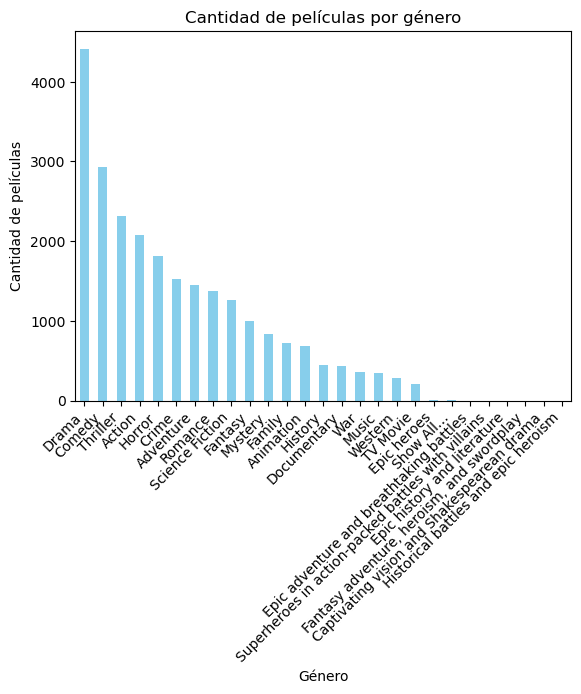

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Drama to Historical battles and epic heroism
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   27 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [ ]:
all_genres = [genre for sublist in df['Genres'] for genre in sublist]

genre_counts = Counter(all_genres)

genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])
genre_counts_df = genre_counts_df.sort_values('Count', ascending=False)

# Graficar
plt.figure(figsize=(12,6))
genre_counts_df.plot(kind='bar', legend=False, color='skyblue')
plt.title('Cantidad de películas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45, ha='right')
plt.show()

genre_counts_df.info()


La Figura muestra la distribución de películas en el dataset según su **género principal**.

- El dataset contiene un total de **27 géneros** distintos.  
- Los géneros con mayor representación son **Drama**, **Comedy** y **Thriller**, superando ampliamente las 2000 películas cada uno.  
- **Action** y **Horror** también presentan una gran presencia, confirmando la relevancia de géneros populares y comerciales.  
- Géneros como **Adventure**, **Romance**, **Crime** y **Science Fiction** ocupan un lugar intermedio en el ranking.  
- Los géneros menos representados incluyen **Western**, **War**, **Music**, así como categorías más específicas o poco comunes (ejemplo: *Epic adventure*, *Superheroes in action*, *Historical battles*).  
- La distribución es altamente **desbalanceada**, con algunos géneros dominando el dataset y muchos otros con apariciones marginales.

**Interpretación:**  
El fuerte peso de géneros como drama y comedia refleja la tendencia histórica de la industria a producir y catalogar más películas en estas categorías. La presencia de géneros minoritarios, aunque con muy bajo volumen, aporta diversidad, lo que puede enriquecer un sistema recomendador al capturar nichos específicos de interés para ciertos usuarios.

**Conclusión:**  
La variable *género* presenta una estructura típica de datos culturales: una **larga cola**, donde unos pocos géneros concentran la mayoría de las películas y una gran cantidad de géneros (27 en total) tienen una representación mínima. Este desbalance debe tenerse en cuenta en los algoritmos de clustering y recomendación, ya que podría sesgar los resultados hacia los géneros dominantes si no se aplican técnicas de balanceo o normalización adecuadas.


# Análisis de la variable Runtime

Estadísticas descriptivas de Runtime:
count    10000.000000
mean       103.169352
std         38.070735
min          2.000000
25%         89.000000
50%         99.000000
75%        113.000000
max        907.000000
Name: Runtime, dtype: float64


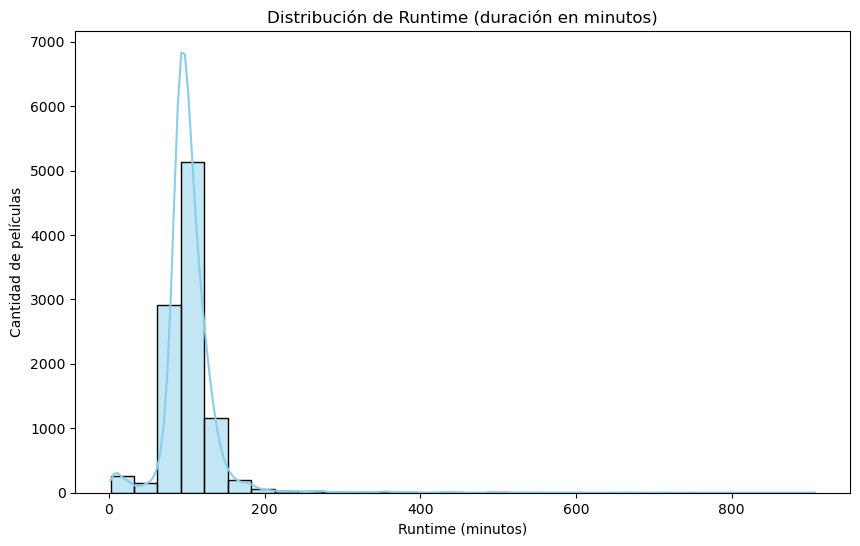

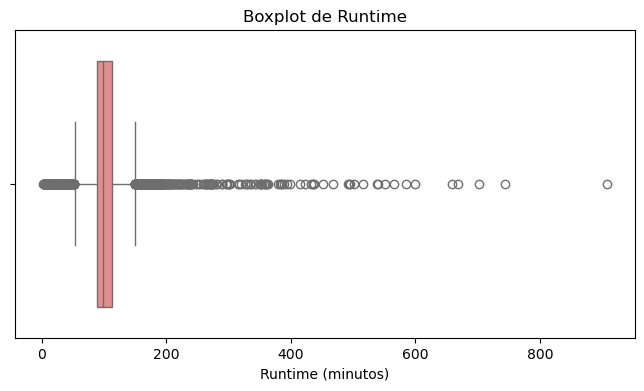

In [23]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de Runtime:")
print(df['Runtime'].describe())

# Histograma de la distribución de Runtime
plt.figure(figsize=(10,6))
sns.histplot(df['Runtime'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Runtime (duración en minutos)')
plt.xlabel('Runtime (minutos)')
plt.ylabel('Cantidad de películas')
plt.show()

# Boxplot para detectar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Runtime'], color='lightcoral')
plt.title('Boxplot de Runtime')
plt.xlabel('Runtime (minutos)')
plt.show()

# Analsis del idioma original de los films

In [ ]:
# Conteo absoluto
conteo = df['Original_language'].value_counts()

# Porcentaje relativo
porcentaje = df['Original_language'].value_counts(normalize=True) * 100

# Unir en un DataFrame
idiomas = pd.DataFrame({
    "Conteo": conteo,
    "Porcentaje (%)": porcentaje
})

# Cantidad total de idiomas distintos
print(f"Idiomas distintos: {len(idiomas)}")

# Mostrar tabla
print(idiomas)

Idiomas distintos: 57
                                  Conteo  Porcentaje (%)
Original_language                                       
English                             8074           80.74
Italian                              396            3.96
Japanese                             308            3.08
French                               291            2.91
Korean                               145            1.45
Spanish                              115            1.15
German                                96            0.96
No spoken language                    94            0.94
Chinese                               66            0.66
Danish                                60            0.60
Cantonese                             58            0.58
Russian                               43            0.43
Swedish                               32            0.32
Polish                                20            0.20
Dutch                                 20            0.20
Portugues

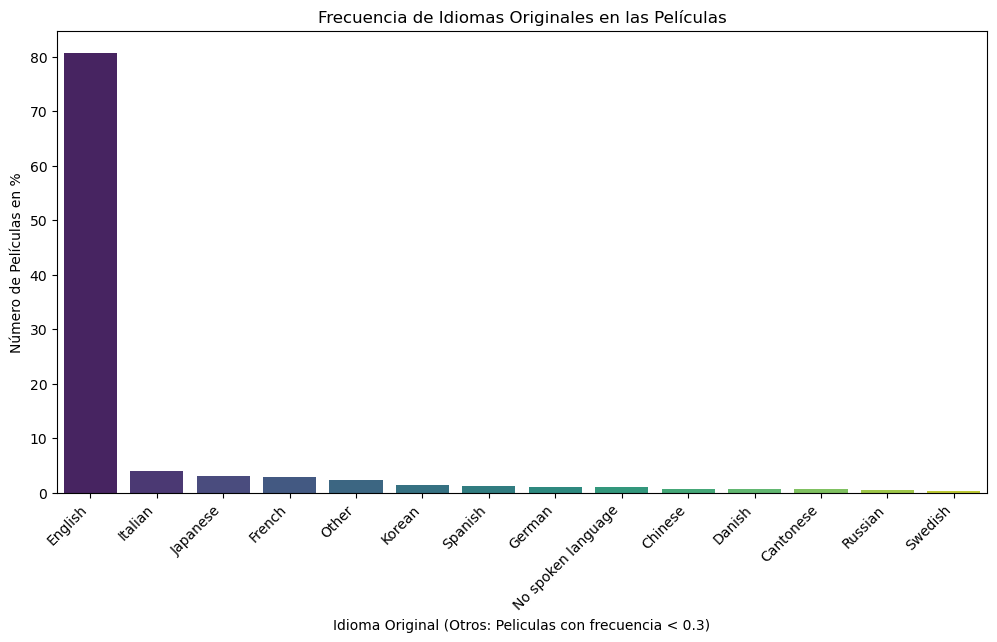

In [ ]:
# Calculo del porcentaje de cada leguaje original
language_percentages = df['Original_language'].value_counts(normalize=True) * 100

# Agrupar lenguajes con 0.3% de frecuencia en la variable otros
other_languages = language_percentages[language_percentages < 0.3].index.tolist()
language_percentages_grouped = language_percentages.copy()
language_percentages_grouped['Other'] = language_percentages_grouped[other_languages].sum()
language_percentages_grouped = language_percentages_grouped.drop(other_languages)
language_percentages_grouped = language_percentages_grouped.sort_values(ascending=False)

# Gráfico de barras con la frecuencia de cada idioma
plt.figure(figsize=(12, 6))
sns.barplot(x=language_percentages_grouped.index,
            y=language_percentages_grouped.values,
            palette='viridis',
            hue=language_percentages_grouped.index,
            legend=False)
plt.title('Frecuencia de Idiomas Originales en las Películas')
plt.xlabel('Idioma Original (Otros: Peliculas con frecuencia < 0.3)')
plt.ylabel('Número de Películas en %')
plt.xticks(rotation=45, ha='right')
plt.show()

Vemos que no hay nulos y en total hay 57 idiomas diferentes, lo cual es mucho.
Luego vamos a agrupar los idiomas antes de hacer un one hot encoding o target encoding

Las clases Movie y Show tienen medias distintas y no tienen nulos. Por ahora es relevante y no hace falta imputar. Sólo convertirla a númerica.

In [ ]:
print("Valores vacíos en 'Description':", (df['Description'].str.strip() == '').sum())

Valores vacíos en 'Description': 0


Estadísticas de longitud de descripción:
count    10000.000000
mean       264.950200
std        141.208441
min         25.000000
25%        154.000000
50%        233.000000
75%        351.000000
max        998.000000
Name: desc_length, dtype: float64


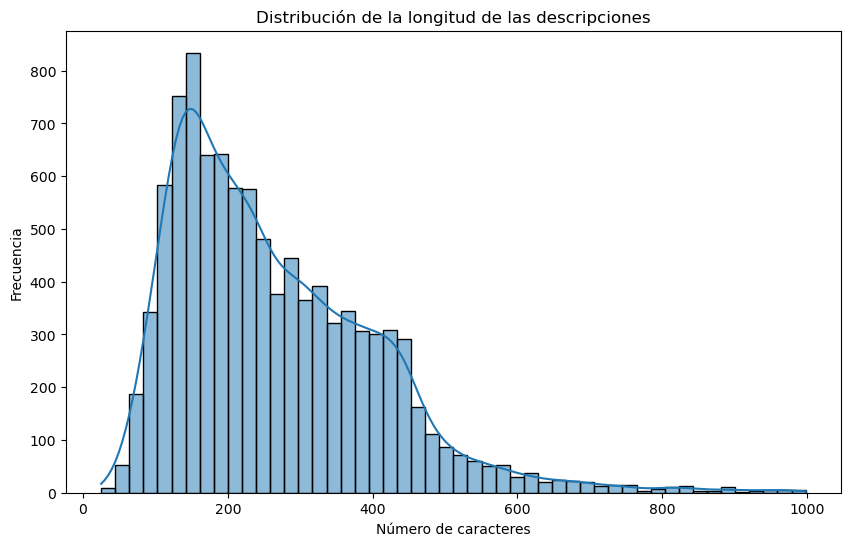

In [ ]:
df['desc_length'] = df['Description'].fillna('').apply(len)
# Estadísticas básicas
print("Estadísticas de longitud de descripción:")
print(df['desc_length'].describe())

# 3. Histograma de longitudes
plt.figure(figsize=(10,6))
sns.histplot(df['desc_length'], bins=50, kde=True)
plt.title('Distribución de la longitud de las descripciones')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

# 4. Palabras más frecuentes (simple tokenización por espacios)
all_words = ' '.join(df['Description'].dropna()).lower().split()
word_counts = Counter(all_words)

Palabras más frecuentes (excluyendo stopwords robustas):
young: 1243
life: 922
must: 781
man: 768
find: 752
world: 650
finds: 631
family: 619
woman: 531
love: 518
get: 512
becomes: 505
help: 497
group: 466
back: 448
soon: 446
years: 441
take: 433
three: 431
mysterious: 415


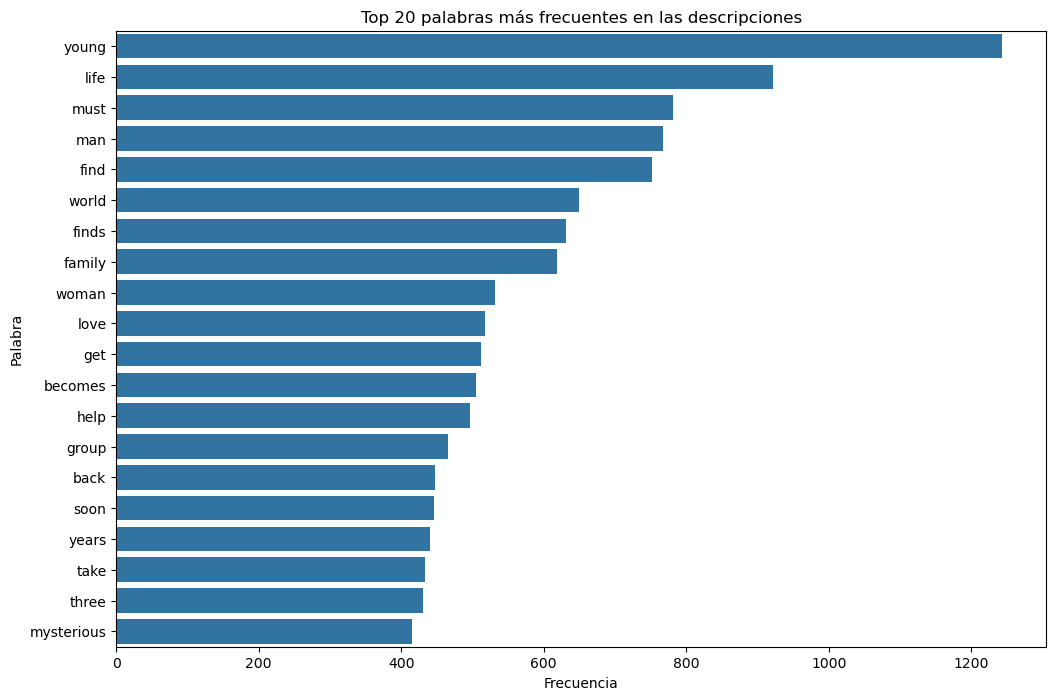

In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter


try:
    stopwords.words('english')
except LookupError:
    print("Descargando la lista de stopwords de NLTK...")
    nltk.download('stopwords')

# Cargar  stopwords en inglés
stop_words = set(stopwords.words('english'))
custom_stopwords = {'he', 'their', 'who', 'when', 'but', 'they', 'has', 'into', 'are', 'she', 'after', 'one', 'him', 'up', 'out', 'two', 'be', 'new', 'also', 'film', 'story'}
stop_words.update(custom_stopwords)

filtered_words = {word: count for word, count in word_counts.items() if word not in stop_words and not word.isdigit()}

most_common = Counter(filtered_words).most_common(20)

print("Palabras más frecuentes (excluyendo stopwords robustas):")
for word, count in most_common:
    print(f"{word}: {count}")

# Graficar
words, counts = zip(*most_common)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 palabras más frecuentes en las descripciones')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

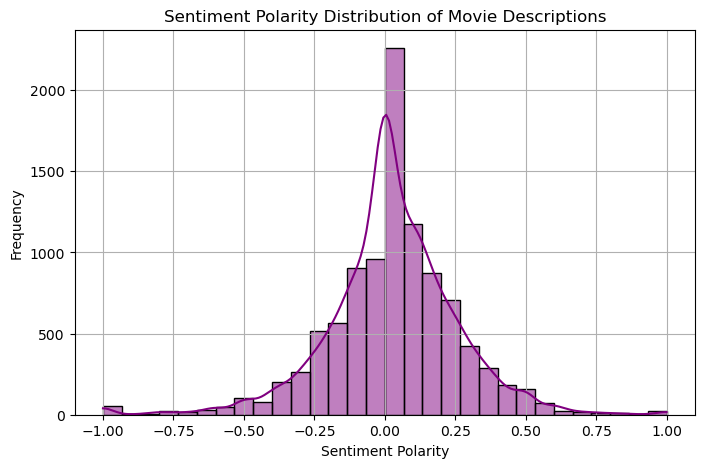

In [ ]:
from textblob import TextBlob

df['Sentiment'] = df['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='purple')
plt.title("Sentiment Polarity Distribution of Movie Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### no sabemos que hacer con esto, tal vez en al pasarla a numerica podamos hacer algo mejor

## Variable Studios

/tmp/ipykernel_1664135/3001274545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_studios_watch.values, y=top_studios_watch.index, palette='YlGnBu')


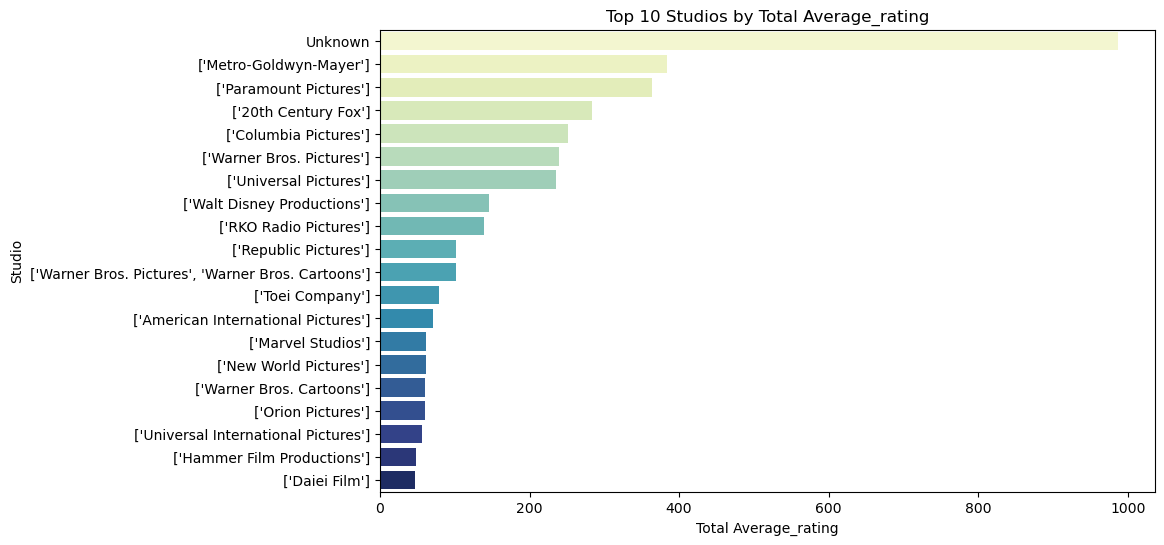

In [ ]:
studio_list = df['Studios'].explode()
df_exploded = df.explode('Studios')  # so we can use it for aggregation

studio_watch = df_exploded.groupby('Studios')['Average_rating'].sum()
top_studios_watch = studio_watch.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_studios_watch.values, y=top_studios_watch.index, palette='YlGnBu')
plt.title("Top 10 Studios by Total Average_rating")
plt.xlabel("Total Average_rating")
plt.ylabel("Studio")
plt.show()

Top 20 estudios más frecuentes:
Warner Bros. Pictures: 502
Paramount Pictures: 423
Columbia Pictures: 411
Universal Pictures: 410
20th Century Fox: 367
Metro-Goldwyn-Mayer: 317
Unknown: 307
United Artists: 165
New Line Cinema: 146
Walt Disney Pictures: 116
Lionsgate: 93
Film4 Productions: 91
Touchstone Pictures: 83
Relativity Media: 82
American International Pictures: 82
Working Title Films: 78
DreamWorks Pictures: 77
TriStar Pictures: 73
Orion Pictures: 71
Village Roadshow Pictures: 70


/tmp/ipykernel_1664135/1900431273.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studios_df, x='Count', y='Studio', palette='viridis')


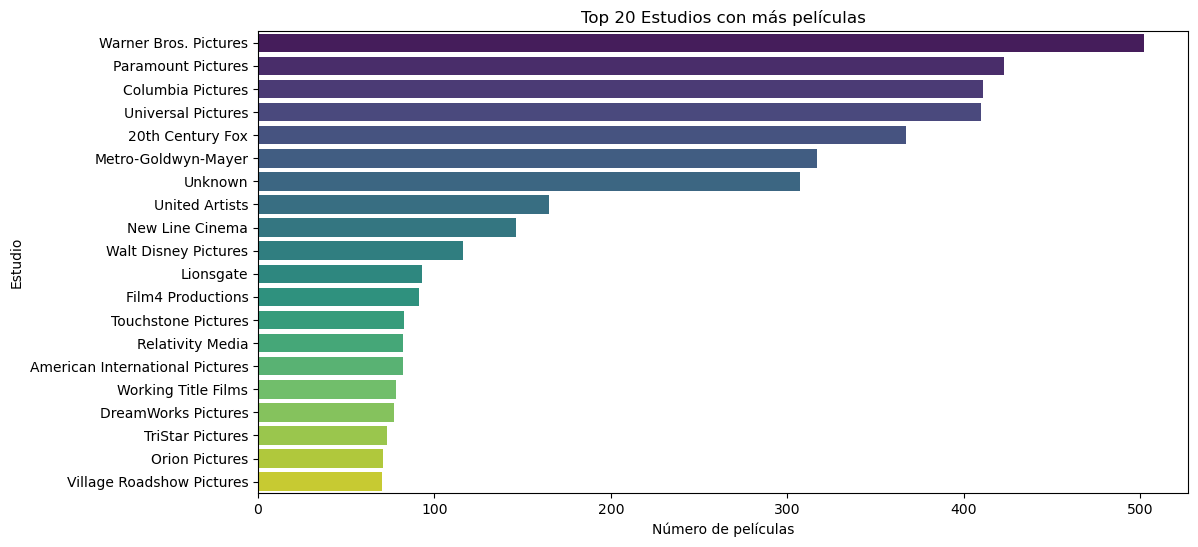

Cantidad de estudios diferentes: 10155
{'Copenhagen Bombay', 'Euforia Film', 'Sarda Cine Service', 'William Cagney Productions', 'The Salt Company International', 'Mezzanine Films', 'Antenne 2', 'Columbia Films', 'Part II Productions', 'Population 1280 Films', 'Dice Film', 'Crystal Sky Pictures', 'CLV-Filmproduktions', 'jellyfish Bloom', 'August Films', 'Belga Films', 'Kickstart Entertainment', 'Made With Love Media', 'Grindstone Entertainment Group', 'Reality High Productions', 'Deaf Internacional Film SrL.', 'Sunstar Entertainment', 'Rasen Production Committee', 'H3 Films', 'Woodline Films Ltd.', 'Cumulus Productions', 'MelinaFilm', 'iFilm', 'Highlander Productions Limited', 'Wildside', 'Transworld Pictures', 'The Jessica Company', 'Apparatus Productions', 'double A Films', 'Sunny Day Media', 'Insiders', 'Fox Animation Studios', 'The American Film Theatre', 'Dago García Producciones', 'Iguana Producciones', 'Gynormous Pictures', 'Indiestory', 'Enigma Pictures', 'Night & Day Pictures'

In [ ]:
import ast
from collections import Counter
import pandas as pd

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val  # Devuelve el valor original si no es evaluable

# Suponiendo df ya cargado
df['Studios_original'] = df['Studios']
df['Studios'] = df['Studios'].apply(safe_literal_eval)

# Ahora solo aplanar cuando sea lista, sino ignorar o convertir en lista de un solo elemento
all_studios = []
for item in df['Studios']:
    if isinstance(item, list):
        all_studios.extend(item)
    elif isinstance(item, str):
        # Por si algunos son strings simples, añadir como único estudio
        all_studios.append(item)
    else:
        # Si es otro tipo, puedes ignorar o manejar según convenga
        pass

# Contar frecuencia
studio_counts = Counter(all_studios)


# Mostrar top 20
most_common_studios = studio_counts.most_common(20)
print("Top 20 estudios más frecuentes:")
for studio, count in most_common_studios:
    print(f"{studio}: {count}")


# Convertir a DataFrame para graficar
studios_df = pd.DataFrame(most_common_studios, columns=['Studio', 'Count'])

# Gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=studios_df, x='Count', y='Studio', palette='viridis')
plt.title('Top 20 Estudios con más películas')
plt.xlabel('Número de películas')
plt.ylabel('Estudio')
plt.show()

num_studios_unicos = len(set(all_studios))
print(f"Cantidad de estudios diferentes: {num_studios_unicos}")
print(set(all_studios))

Vemos que hay más de 300 peliculas que tiene el studio Unknown

# Analisis de la variable Watches


===== Watches =====
count    1.000000e+04
mean     1.703148e+05
std      4.585329e+05
min      2.000000e+00
25%      2.979750e+03
50%      1.842500e+04
75%      1.083580e+05
max      5.195503e+06
Name: Watches, dtype: float64
Valores nulos: 0


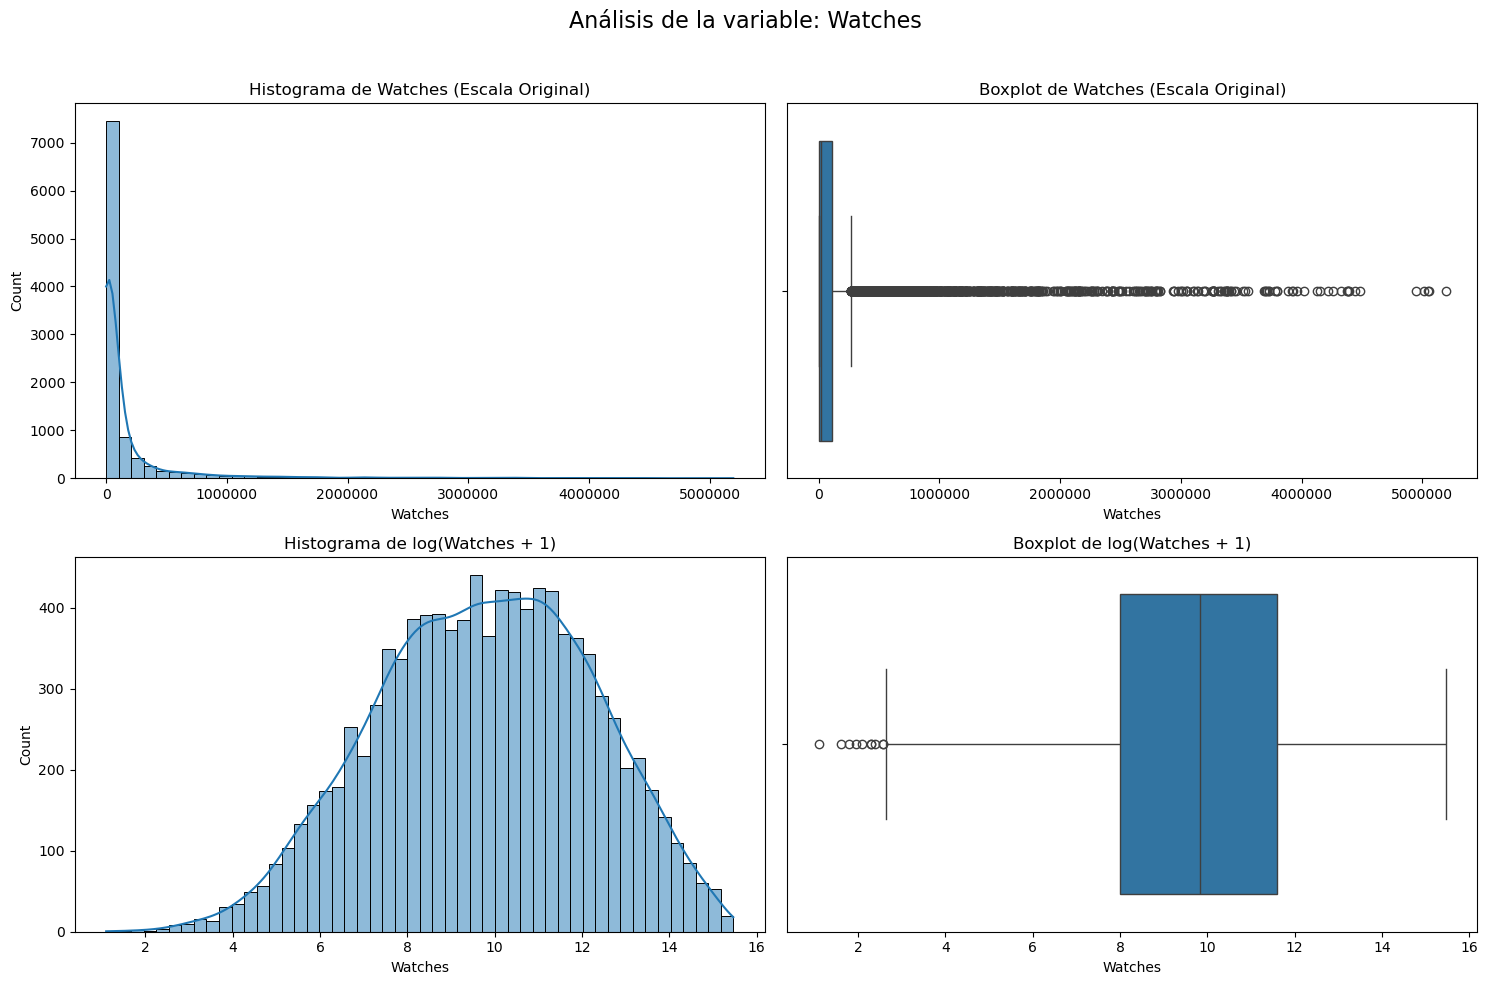


Análisis de Outliers para la columna: 'Watches'
Cantidad de outliers: 1427
Porcentaje de outliers: 14.27%

Ejemplos de outliers:
                    Film_title  Watches
1           Mad Max: Fury Road  2488721
2                     Suspiria   618171
3          Lost in Translation  1596190
4                        Akira   873068
6  Big Trouble in Little China   283873


In [ ]:
col = "Watches"

print(f"\n===== {col} =====")
print(df[col].describe())
print(f"Valores nulos: {df[col].isnull().sum()}")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Análisis de la variable: {col}', fontsize=16)


# Histograma en escala original (Top-Left)
sns.histplot(data=df, x=col, bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title(f'Histograma de {col} (Escala Original)')
axes[0, 0].ticklabel_format(style='plain', axis='x') # Evitar notación científica

# Boxplot en escala original (Top-Right)
sns.boxplot(data=df, x=col, ax=axes[0, 1])
axes[0, 1].set_title(f'Boxplot de {col} (Escala Original)')
axes[0, 1].ticklabel_format(style='plain', axis='x') # Evitar notación científica


# Histograma en escala logarítmica (Bottom-Left)
log_transformed_data = np.log1p(df[col])
sns.histplot(log_transformed_data, bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title(f'Histograma de log({col} + 1)')

# Boxplot en escala logarítmica (Bottom-Right)
sns.boxplot(x=log_transformed_data, ax=axes[1, 1])
axes[1, 1].set_title(f'Boxplot de log({col} + 1)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculo de outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]


num_outliers = len(outliers)
total_datos = len(df)


porcentaje_outliers = (num_outliers / total_datos) * 100

print(f"\nAnálisis de Outliers para la columna: '{col}'")
print(f"Cantidad de outliers: {num_outliers}")
print(f"Porcentaje de outliers: {porcentaje_outliers:.2f}%")

if num_outliers > 0:
    print("\nEjemplos de outliers:")
    print(outliers[['Film_title', col]].head())



Nos encontramos con una distribución de "cola larga": la gran mayoría de las películas tienen un número modesto de visualizaciones, mientras que un pequeño grupo de grandes éxitos acapara millones. La estadística lo confirma: la media (170k) es casi diez veces la mediana (18k), mostrando el enorme peso de esos valores atípicos.

Los gráficos son la prueba definitiva. En la fila superior, vemos la distribución original, totalmente apilada a la izquierda y casi ilegible. Sin embargo, la fila inferior es la más reveladora: después de una transformación logarítmica, la distribución se asemeja mucho más a una campana, volviéndose simétrica y manejable.

# Analisis List_appearances


===== List_appearances =====
count     10000.000000
mean      26868.798600
std       56751.328696
min          33.000000
25%        1674.000000
50%        6503.000000
75%       23908.250000
max      803670.000000
Name: List_appearances, dtype: float64
Valores nulos: 0


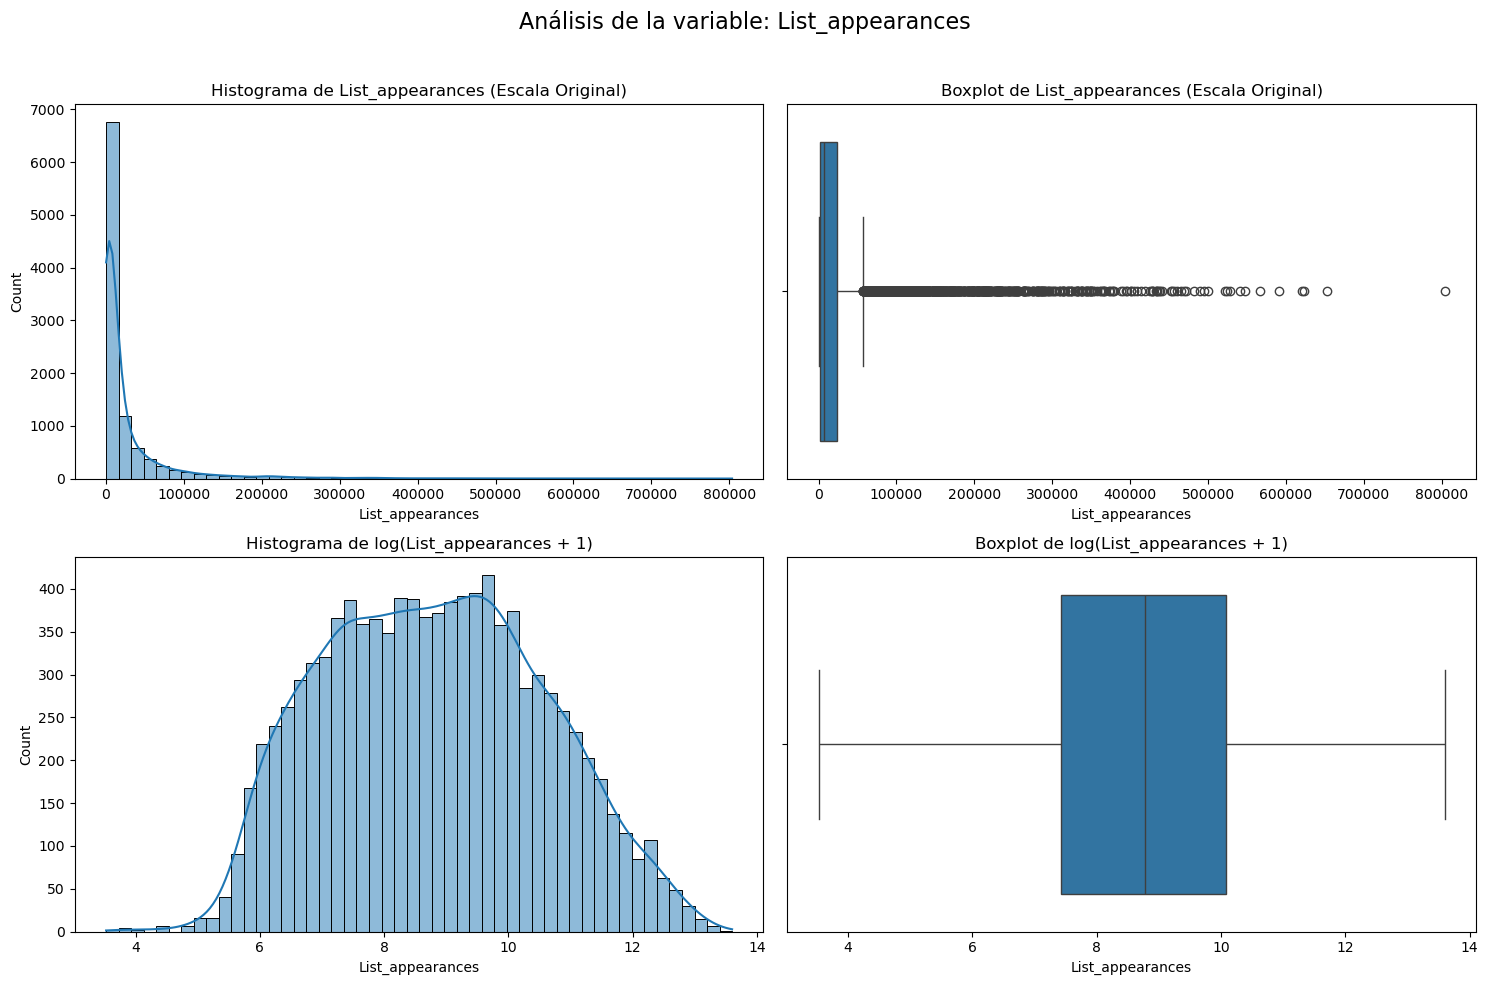


Análisis de Outliers para la columna: 'List_appearances'
Cantidad de outliers: 1249
Porcentaje de outliers: 12.49%

Ejemplos de outliers:
                    Film_title  List_appearances
1           Mad Max: Fury Road            331681
2                     Suspiria            220094
3          Lost in Translation            254180
4                        Akira            175586
6  Big Trouble in Little China             65558


In [ ]:
col = "List_appearances"

print(f"\n===== {col} =====")
print(df[col].describe())
print(f"Valores nulos: {df[col].isnull().sum()}")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Análisis de la variable: {col}', fontsize=16)


# Histograma en escala original (Top-Left)
sns.histplot(data=df, x=col, bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title(f'Histograma de {col} (Escala Original)')
axes[0, 0].ticklabel_format(style='plain', axis='x') # Evitar notación científica

# Boxplot en escala original (Top-Right)
sns.boxplot(data=df, x=col, ax=axes[0, 1])
axes[0, 1].set_title(f'Boxplot de {col} (Escala Original)')
axes[0, 1].ticklabel_format(style='plain', axis='x') # Evitar notación científica




# Histograma en escala logarítmica (Bottom-Left)
log_transformed_data = np.log1p(df[col])
sns.histplot(log_transformed_data, bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title(f'Histograma de log({col} + 1)')

# Boxplot en escala logarítmica (Bottom-Right)
sns.boxplot(x=log_transformed_data, ax=axes[1, 1])
axes[1, 1].set_title(f'Boxplot de log({col} + 1)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculo de outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]


num_outliers = len(outliers)
total_datos = len(df)


porcentaje_outliers = (num_outliers / total_datos) * 100

print(f"\nAnálisis de Outliers para la columna: '{col}'")
print(f"Cantidad de outliers: {num_outliers}")
print(f"Porcentaje de outliers: {porcentaje_outliers:.2f}%")

if num_outliers > 0:
    print("\nEjemplos de outliers:")
    print(outliers[['Film_title', col]].head())

La historia es la misma: la mayoría de las películas aparecen en una cantidad relativamente pequeña de listas, mientras que unos pocos títulos muy famosos figuran en una cantidad masiva de ellas. Una vez más, la media (26,868) es mucho mayor que la mediana (6,503), lo que nos habla del gran impacto que tienen esas películas "superestrellas" en el promedio.

Los gráficos de la fila superior muestran esta fuerte asimetría. Pero, al igual que con las otras variables, la transformación logarítmica en la fila inferior hace maravillas: convierte la distribución en una forma de campana, simétrica y lista para ser utilizada por un modelo.

# Analisis de Likes


===== Likes =====
count    1.000000e+04
mean     4.373479e+04
std      1.515314e+05
min      0.000000e+00
25%      4.570000e+02
50%      3.394000e+03
75%      2.011225e+04
max      2.730813e+06
Name: Likes, dtype: float64
Valores nulos: 0


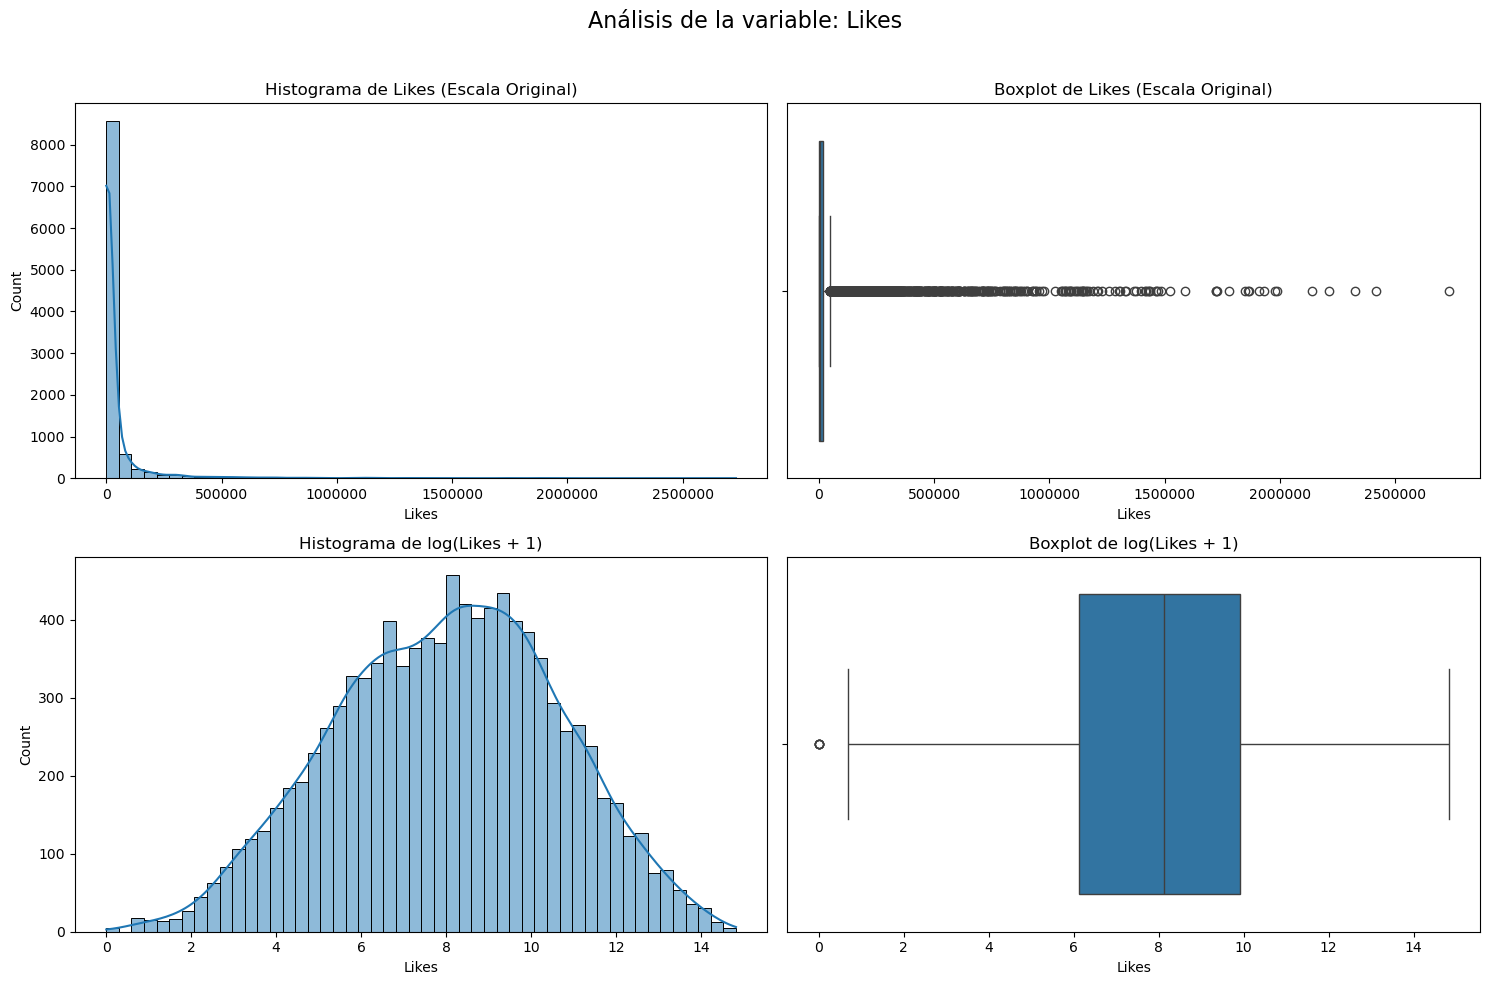


Análisis de Outliers para la columna: 'Likes'
Cantidad de outliers: 1513
Porcentaje de outliers: 15.13%

Ejemplos de outliers:
                    Film_title   Likes
1           Mad Max: Fury Road  927538
2                     Suspiria  219548
3          Lost in Translation  493248
4                        Akira  341567
6  Big Trouble in Little China   85788


In [ ]:
col = "Likes"


print(f"\n===== {col} =====")
print(df[col].describe())
print(f"Valores nulos: {df[col].isnull().sum()}")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Análisis de la variable: {col}', fontsize=16)


# Histograma en escala original (Top-Left)
sns.histplot(data=df, x=col, bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title(f'Histograma de {col} (Escala Original)')
axes[0, 0].ticklabel_format(style='plain', axis='x') # Evitar notación científica

# Boxplot en escala original (Top-Right)
sns.boxplot(data=df, x=col, ax=axes[0, 1])
axes[0, 1].set_title(f'Boxplot de {col} (Escala Original)')
axes[0, 1].ticklabel_format(style='plain', axis='x') # Evitar notación científica




# Histograma en escala logarítmica (Bottom-Left)
log_transformed_data = np.log1p(df[col])
sns.histplot(log_transformed_data, bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title(f'Histograma de log({col} + 1)')

# Boxplot en escala logarítmica (Bottom-Right)
sns.boxplot(x=log_transformed_data, ax=axes[1, 1])
axes[1, 1].set_title(f'Boxplot de log({col} + 1)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculo de outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]


num_outliers = len(outliers)
total_datos = len(df)


porcentaje_outliers = (num_outliers / total_datos) * 100

print(f"\nAnálisis de Outliers para la columna: '{col}'")
print(f"Cantidad de outliers: {num_outliers}")
print(f"Porcentaje de outliers: {porcentaje_outliers:.2f}%")

if num_outliers > 0:
    print("\nEjemplos de outliers:")
    print(outliers[['Film_title', col]].head())

La gran mayoría de las películas tienen un número bajo de "Me gusta", mientras que un puñado de ellas son éxitos masivos que acaparan una cantidad enorme de likes.

Esto lo vemos en los números: la media (43,734) es más de diez veces mayor que la mediana (3,394), una señal inequívoca de que unos pocos valores muy altos están "inflando" el promedio. El histograma lo confirma visualmente, con casi todos los datos apilados a la izquierda.

El boxplot, incluso después de aplicar una transformación para visualizar mejor la distribución, sigue mostrando una gran cantidad de valores atípicos. Para nuestros futuros modelos, esta fuerte asimetría nos indica que una transformación logarítmica de esta variable será un paso fundamental para mejorar su rendimiento.

# Analisis de la variable Fans


===== Fans =====
count     10000.000000
mean       1652.549700
std        9368.258118
min           0.000000
25%           2.000000
50%          24.000000
75%         283.000000
max      326000.000000
Name: Fans, dtype: float64
Valores nulos: 0


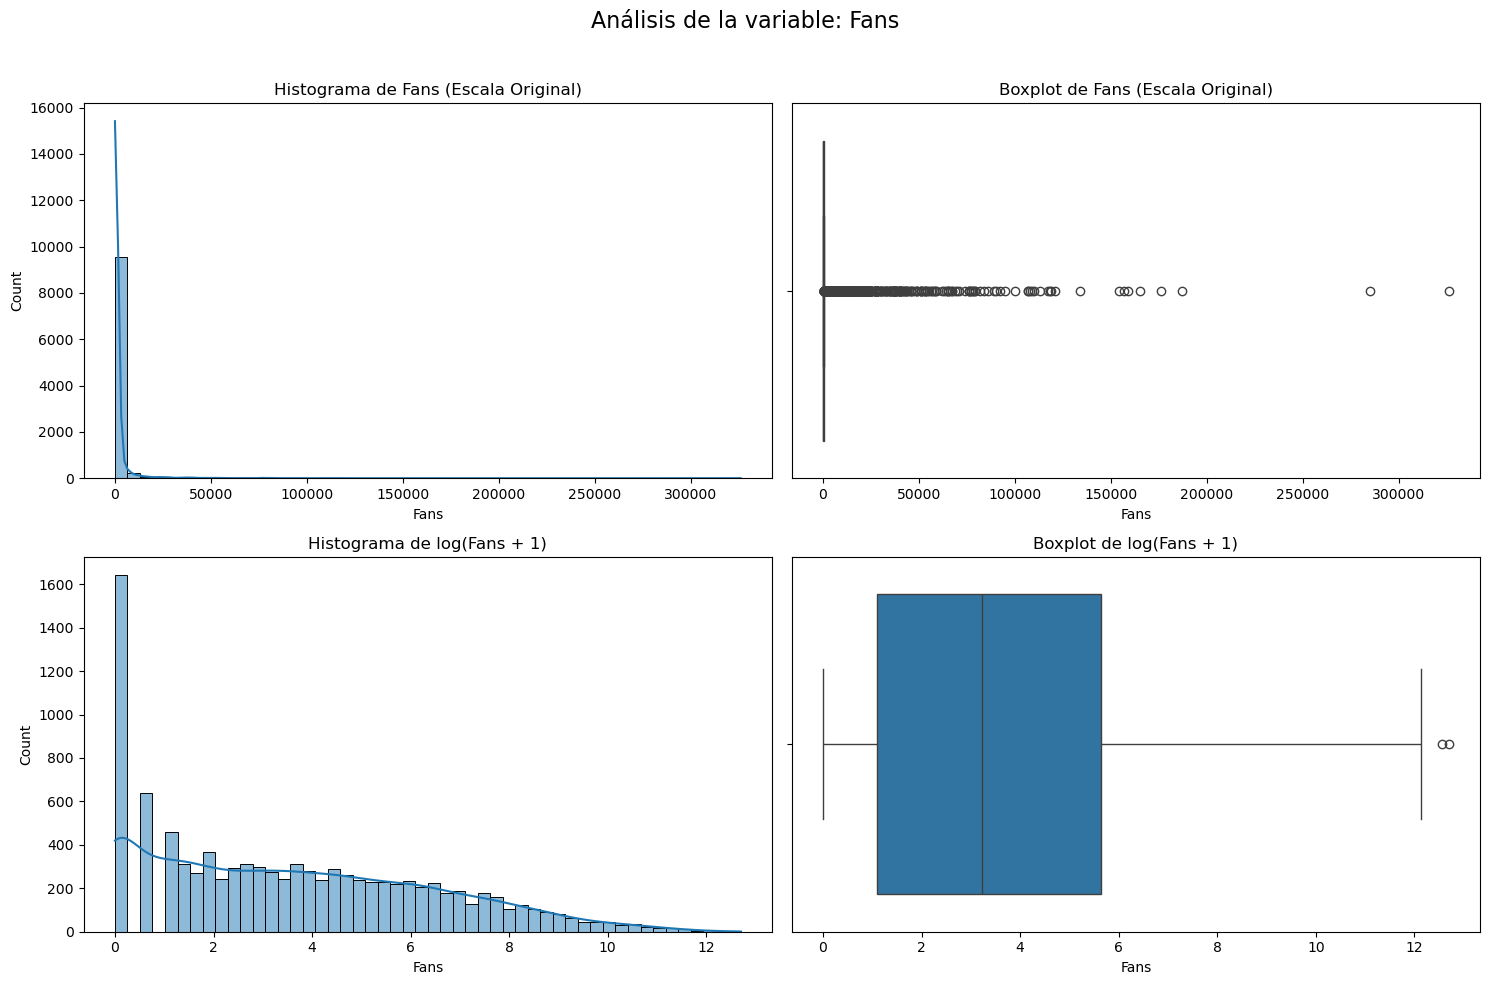


Análisis de Outliers para la columna: 'Fans'
Cantidad de outliers: 1715
Porcentaje de outliers: 17.15%

Ejemplos de outliers:
                    Film_title   Fans
1           Mad Max: Fury Road  38000
2                     Suspiria  13000
3          Lost in Translation  38000
4                        Akira  21000
6  Big Trouble in Little China   3800


In [ ]:

col = "Fans"

print(f"\n===== {col} =====")
print(df[col].describe())
print(f"Valores nulos: {df[col].isnull().sum()}")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Análisis de la variable: {col}', fontsize=16)


# Histograma en escala original (Top-Left)
sns.histplot(data=df, x=col, bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title(f'Histograma de {col} (Escala Original)')
axes[0, 0].ticklabel_format(style='plain', axis='x') # Evitar notación científica

# Boxplot en escala original (Top-Right)
sns.boxplot(data=df, x=col, ax=axes[0, 1])
axes[0, 1].set_title(f'Boxplot de {col} (Escala Original)')
axes[0, 1].ticklabel_format(style='plain', axis='x') # Evitar notación científica




# Histograma en escala logarítmica (Bottom-Left)
log_transformed_data = np.log1p(df[col])
sns.histplot(log_transformed_data, bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title(f'Histograma de log({col} + 1)')

# Boxplot en escala logarítmica (Bottom-Right)
sns.boxplot(x=log_transformed_data, ax=axes[1, 1])
axes[1, 1].set_title(f'Boxplot de log({col} + 1)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculo de outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]


num_outliers = len(outliers)
total_datos = len(df)


porcentaje_outliers = (num_outliers / total_datos) * 100

print(f"\nAnálisis de Outliers para la columna: '{col}'")
print(f"Cantidad de outliers: {num_outliers}")
print(f"Porcentaje de outliers: {porcentaje_outliers:.2f}%")

if num_outliers > 0:
    print("\nEjemplos de outliers:")
    print(outliers[['Film_title', col]].head())

La variable "Fans" muestra que casi todas las películas tienen una base de fans muy pequeña, mientras que unas pocas mega-producciones acaparan cientos de miles, dominando completamente el panorama.

La prueba más clara está en los números: la mediana es de tan solo 24 fans, pero la media se dispara a 1,652 por la influencia de esos pocos éxitos masivos.

Los gráficos lo hacen evidente: el histograma es prácticamente una línea vertical a la izquierda con una cola larguísima, y el boxplot nos confirma la presencia masiva de valores atípicos.

Para nuestro modelo, esto refuerza la misma idea: será indispensable aplicar una transformación logarítmica a esta variable para poder trabajar con ella sin que los valores extremos distorsionen por completo las predicciones.

# Análisis de correlación

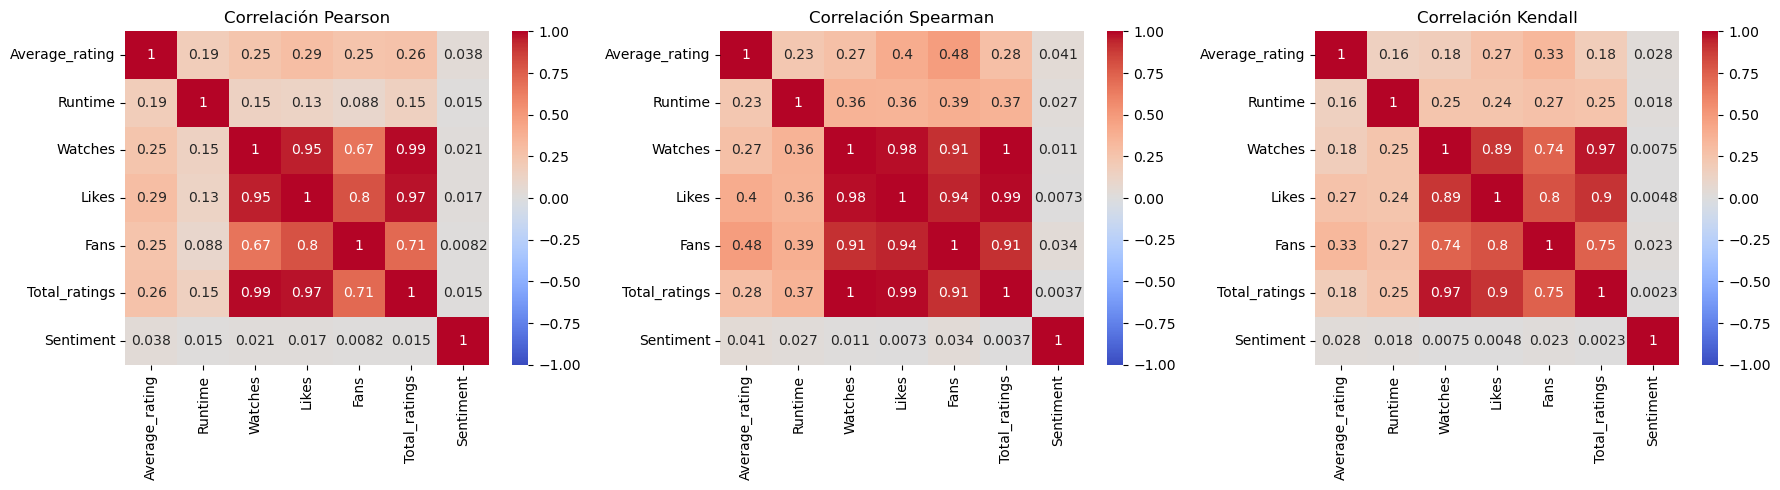

In [ ]:
# Seleccionar columnas numéricas relevantes para correlación
numerical_cols = ['Average_rating', 'Runtime', 'Watches', 'Likes', 'Fans', 'Total_ratings', 'Sentiment']

df_num = df[numerical_cols]

# 1. Matriz de correlación Pearson
corr_pearson = df_num.corr(method='pearson')

# 2. Matriz de correlación Spearman
corr_spearman = df_num.corr(method='spearman')


# 3. Matriz de correlación Kendall
corr_kendall = df_num.corr(method='kendall')

# Visualización con heatmap para cada matriz
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Pearson')

plt.subplot(1,3,2)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Spearman')

plt.subplot(1,3,3)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Kendall')

plt.tight_layout()
plt.show()

Las variables Watches, Likes, Fans y Total_ratings  Se mueven tan  juntas que miden casi lo mismo: la popularidad. Lo más inteligente es elegir solo una que represente la popularidad y seguir adelante.

Existe una relación positiva, aunque moderada, entre la calificación (Average_rating) y las métricas de popularidad. Esto es coherente: si bien una película muy popular no es necesariamente la de mayor calidad, es evidente que a las películas con buenas calificaciones les resulta más fácil alcanzar una mayor popularidad

Lo mejor de todo es que los tres métodos coinciden, así que podemos estar muy seguros de que estas conclusiones son sólidas.